In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc

np.random.seed(1)
plt.rcParams['text.color'] = 'black'
sc.set_figure_params(dpi=100, dpi_save=300, facecolor='white')
plt.style.use('ggplot')


In [3]:
import pandas as pd

plt.rcParams['text.color'] = 'black'
plt.style.use('ggplot')

# 创建数据
mean = {
    'metrics': ['hPancreas', 'hPBMC', 'mCortex'],
    'SCALEX': [0.549806117, 0.543994991, 0.53016663],
    'ComGRN': [0.57145886, 0.541776006, 0.533678606],
}

std = {
    'metrics': ['hPancreas', 'hPBMC', 'mCortex'],
    'SCALEX': [0.03441204, 0.02014813, 0.017904901],
    'ComGRN': [0.0200239627, 0.019000537, 0.01647348],
}

# 创建数据框
df = pd.DataFrame(mean)
df = df.set_index('metrics')

vf = pd.DataFrame(std)
vf = vf.set_index('metrics')

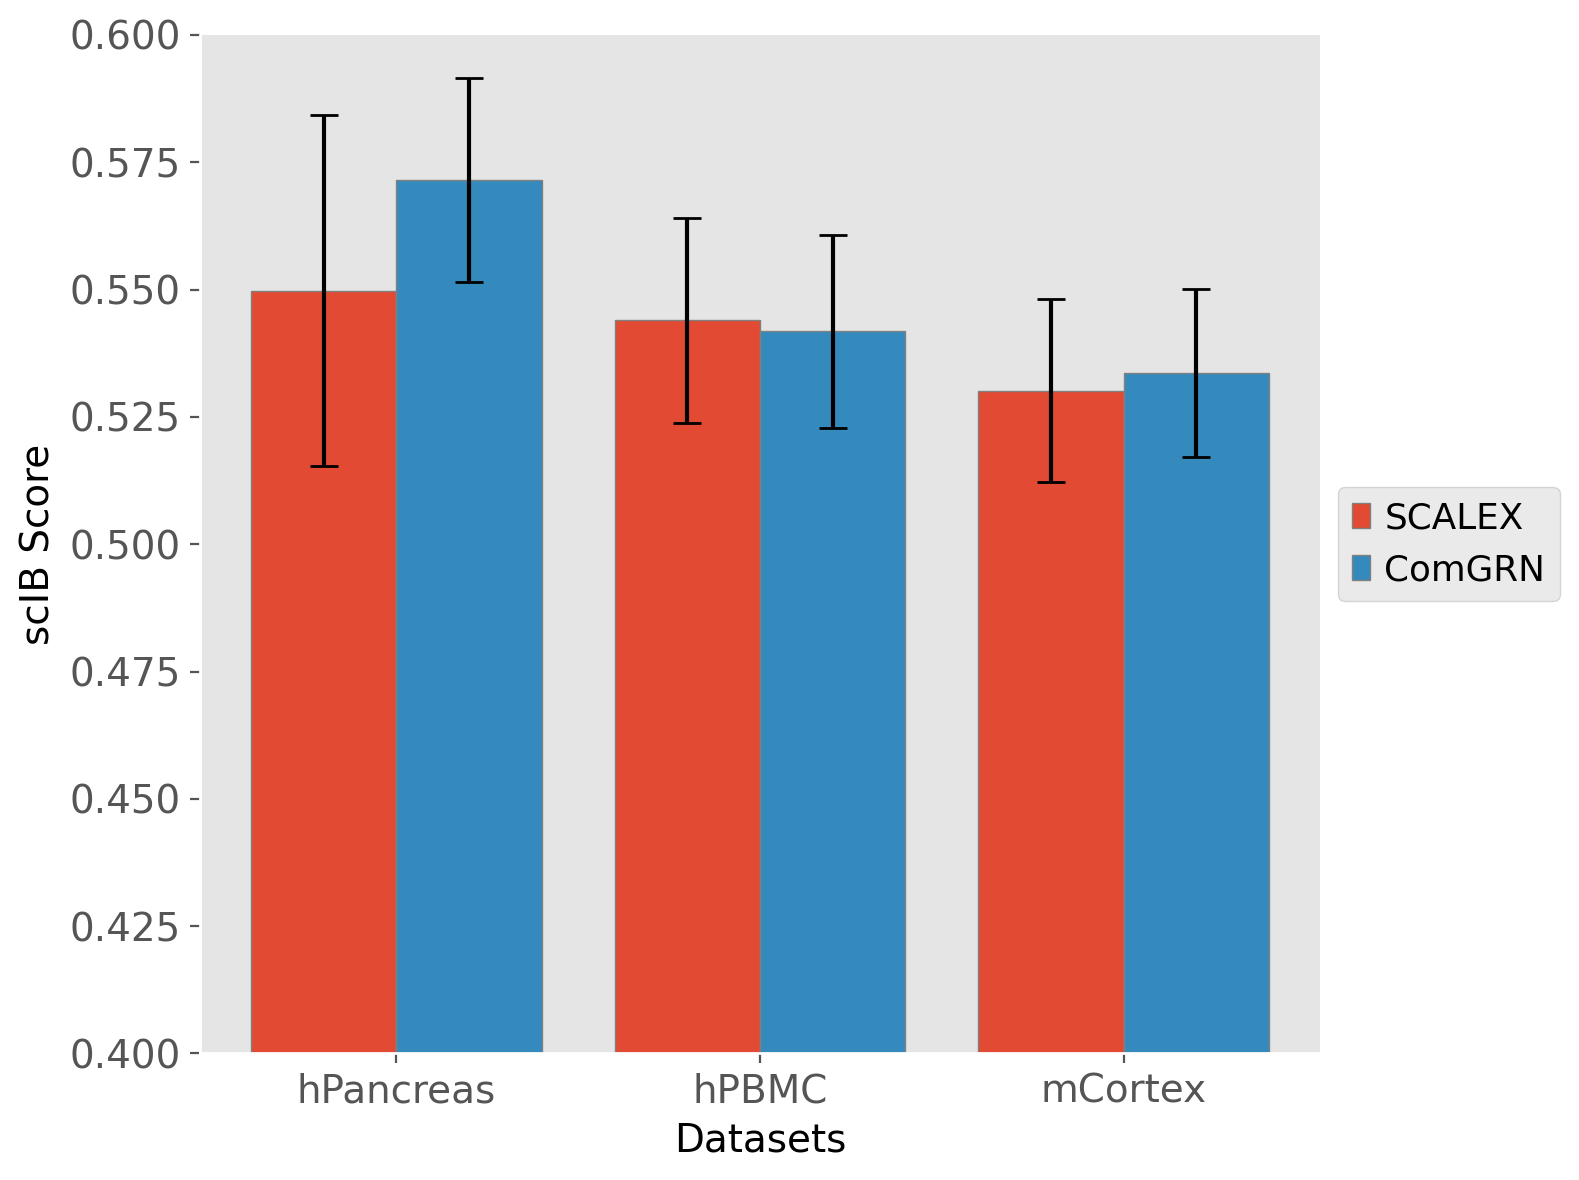

In [12]:
# 绘制条形图
dropouts = df.index.to_series()

# Create a bar chart
fig, ax = plt.subplots(figsize=(8, 6))

for i, label in enumerate(df.columns):
    # print(label)
    ax.bar([x + (i- 0.5) * 0.4 for x in range(len(dropouts))], df[label], yerr=vf[label], width=0.4, label=label, edgecolor='grey', capsize=5)
    # ax.set_xticklabels(df.index, rotation=45, ha='right')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.set_xticks(range(len(dropouts)))
ax.set_xticklabels(dropouts)
ax.set_ylim(0.4, 0.6)
# ax.set_title('Comparison of Different Methods')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Datasets', fontsize=14)
plt.ylabel('scIB Score', fontsize=14)
plt.grid(False)
# plt.xticks(rotation=45)
plt.tight_layout()
# plt.title("The different Metrics of CKG detection")
plt.savefig('./fig-3_zs.pdf')
plt.show()